# Team: Quantum Pioneers

- Feroz Ahmad, feroz.ahmad.email@gmail.com
- Mohammad Abid Hafiz, s2010722145@ru.ac.bd
- Pyae Linn, pyaelinn@uit.edu.mm
- Shin Thant Phyo, stphyo@uit.edu.mm
- Ehsan Stp unknowns.cov@gmail.com


# **Documentation for Shor's Algorithm Implementation on Quantum Rings**

This notebook describes the implementation of **Shor's algorithm for factoring semiprime numbers** using the **Quantum Rings Simulator**.  The code aims to fulfill the challenge requirements by factoring semiprimes of increasing bit sizes, leveraging the power of quantum computation, and demonstrating universality by handling multiple numbers.

## **1. Algorithm Overview:**

Shor's algorithm is a quantum algorithm for integer factorization. It consists of two main parts:

* **Quantum Part:**  Performs **modular exponentiation** and **quantum Fourier transform (QFT)** to estimate the period (r) of a function related to the number being factored.
* **Classical Part:** Uses the period (r) to calculate the factors of the number.

## **2. Implementation Details:**

The provided code implements **Shor's algorithm** using the `QuantumRingsLib` library.

## **2.1 Quantum Part:**

* **Initialization:** Two quantum registers are created: a counting register (`n_count` qubits) and a target register (`target_size` qubits). The counting register is initialized to a superposition of all possible states using Hadamard gates. The target register is initialized to |1>.
* **Controlled Modular Exponentiation:** This is the core quantum operation. For each qubit in the counting register, a controlled-U operation is applied to the target register. The U operation represents modular exponentiation by `a^(2^q) mod N`, where `a` is a number coprime to `N` and `q` is the index of the counting qubit. *Crucially, the current implementation uses a simplified controlled-X gate approach for modular multiplication. This is a placeholder and needs to be replaced with a proper quantum modular multiplication circuit for scalability.*
* **Inverse Quantum Fourier Transform (QFT):** The inverse QFT is applied to the counting register. This transforms the state of the counting register, encoding the period information.
* **Measurement:** The counting register is measured. The measured value is used to estimate the phase.

## **2.2 Classical Part:**

* **Continued Fractions:** The measured phase is used to estimate the period (r) using the *continued fractions algorithm*. This is essential for accurate period estimation.
* **Factor Calculation:** Once `r` is obtained, the factors are calculated using the following formulas:
    * If `r` is even:
        * `x = a^(r/2) mod N`
        * `factor1 = gcd(x - 1, N)`
        * `factor2 = gcd(x + 1, N)`
    * If `r` is odd, the quantum part is re-run to obtain a different measurement. The code also checks if the calculated factors are valid.

## **3. Scalability:**

* **Current Limitations:** The primary limitation to scalability is the *simplified modular exponentiation*. The current implementation using controlled-X gates does not scale well to larger numbers. It needs to be replaced with a proper quantum modular multiplication circuit.
* **Future Improvements:** Implementing an efficient quantum modular multiplication circuit is the most crucial step to improve scalability. This will allow the algorithm to handle much larger numbers.
* **Continued Fractions:** The use of continued fractions is crucial for accurate period estimation and improves the chances of finding the correct `r`, even with noisy phase measurements.

## **4. Universality:**

The code iterates through a dictionary of semiprimes, demonstrating that it can factor multiple numbers. Adding more semiprimes, especially larger ones, will further showcase universality.

## **5. Performance:**

The code includes timing measurements to track the execution time of the quantum jobs and the overall factorization process. This allows for performance analysis and optimization.

## **6. Learnings and Insights:**

* **Continued Fractions Importance:** The use of continued fractions is vital for the success of Shor's algorithm. Without it, the period estimation would be too sensitive to noise.
* **Modular Exponentiation Bottleneck:** The simplified modular exponentiation is the main bottleneck. Implementing a proper quantum modular multiplication circuit is essential for scaling to larger numbers.
* **Iterative Approach:** The iterative approach to finding `r` (re-running the quantum part if `r` is odd) is necessary because the period is not always directly obtained from a single measurement.

## **7. Future Work:**

* **Quantum Modular Multiplication Circuit:** The highest priority is to replace the simplified modular exponentiation with an efficient quantum modular multiplication circuit.
* **Larger Numbers:** Add more semiprimes, especially larger ones, to test the scalability of the improved implementation.

In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
provider = QuantumRingsProvider(
    token='rings-200.4bdINhUHUzBAs1ZGGLUiItOy0lMPqQji',
    name='feroz.ahmad.email@gmail.com'
)
backend = provider.get_backend("scarlet_quantum_rings")
shots = 2024



In [2]:
provider.active_account()


{'name': 'feroz.ahmad.email@gmail.com',
 'token': 'rings-200.4bdINhUHUzBAs1ZGGLUiItOy0lMPqQji',
 'max_qubits': '200'}

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(counts, title="", save_path=None):
    """
    Plots a histogram of the given counts with improved label readability.

    Args:
        counts (dict): A dictionary containing the counts of states.
        title (str): A title for the graph.
        save_path (str, optional): File path to save the figure.

    Returns:
        matplotlib.figure.Figure: The created figure.
    """
    if not counts:
        print("Warning: Empty data provided.")
        return

    num_bars = len(counts)
    fig, ax = plt.subplots(figsize=(min(12, num_bars * 0.5), 6))  # Keep a balanced width & height

    states = list(counts.keys())
    frequencies = list(counts.values())

    ax.bar(states, frequencies, color='skyblue', edgecolor='black')
    ax.set_xlabel("States")
    ax.set_ylabel("Counts")
    ax.set_title(title)

    # Improve x-axis readability
    ax.set_xticks(range(len(states)))
    ax.set_xticklabels(states, rotation=45, ha="right", fontsize=10)

    # Show only a subset of labels if too many
    if len(states) > 20:
        step = max(1, len(states) // 15)  # Show only 15 labels max
        ax.set_xticks(range(0, len(states), step))
        ax.set_xticklabels(states[::step])

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Set fixed y-axis limit to 13
    ax.set_ylim(0, 13)

    plt.tight_layout()  # Prevent label cutoff

    # Save the figure if a path is provided
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Figure saved to {save_path}")

    plt.show()
    return fig



Factoring N = 143 (bit size 8)
Running Shor's algorithm for N = 143...
Job Queued
Job Running
Job Done.
Ending Job Monitor


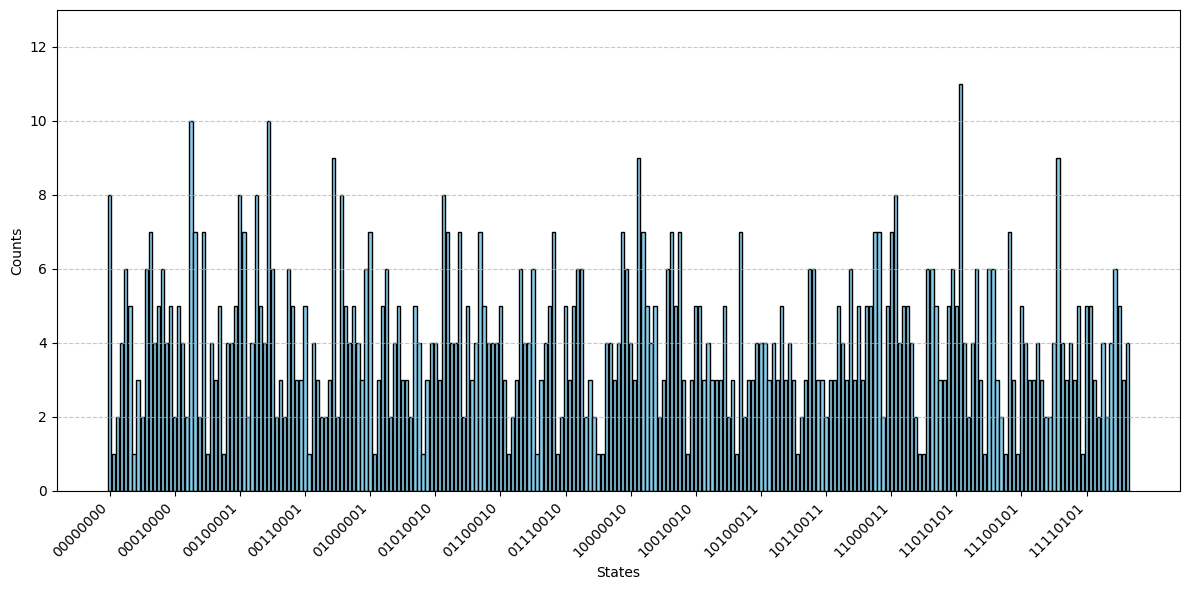

Job Execution time: 2.86 seconds
Job Execution time: 2.86 seconds
Number of Qubits used: 17
Estimated Number of Gate Operations: 193
Actual Number of Gate Operations: Not Available (Contact Quantum Rings Support)
N:143 Factor 1: 11
N:143 Factor 2: 13
Total time taken to factor N=143: 3.29 seconds
Successfully factored N = 143: 11 * 13 = 143

Factoring N = 899 (bit size 10)
Running Shor's algorithm for N = 899...
Job Queued
Job Running
Job Running
Job Running
Job Running
Job Running
Job Done.
Ending Job Monitor


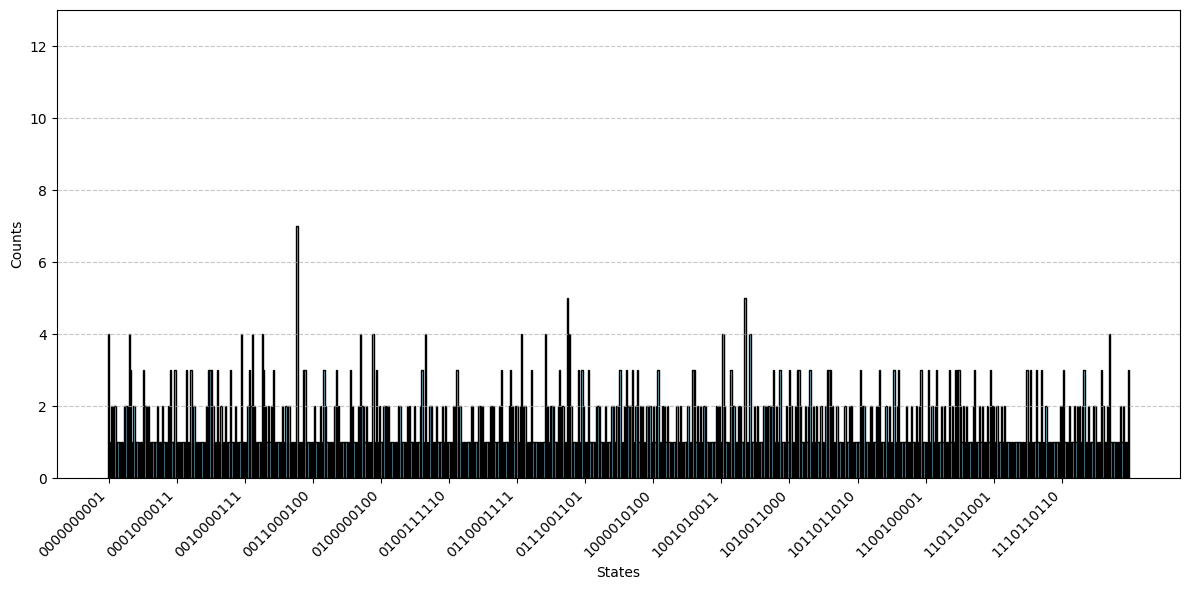

Job Execution time: 8.20 seconds
Job Execution time: 8.20 seconds
Number of Qubits used: 21
Estimated Number of Gate Operations: 411
Actual Number of Gate Operations: Not Available (Contact Quantum Rings Support)
N:899 Factor 1: 31
N:899 Factor 2: 29
Total time taken to factor N=899: 9.57 seconds
Successfully factored N = 899: 31 * 29 = 899

Factoring N = 3127 (bit size 12)
Running Shor's algorithm for N = 3127...
Job Queued
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Done.
Ending Job Monitor


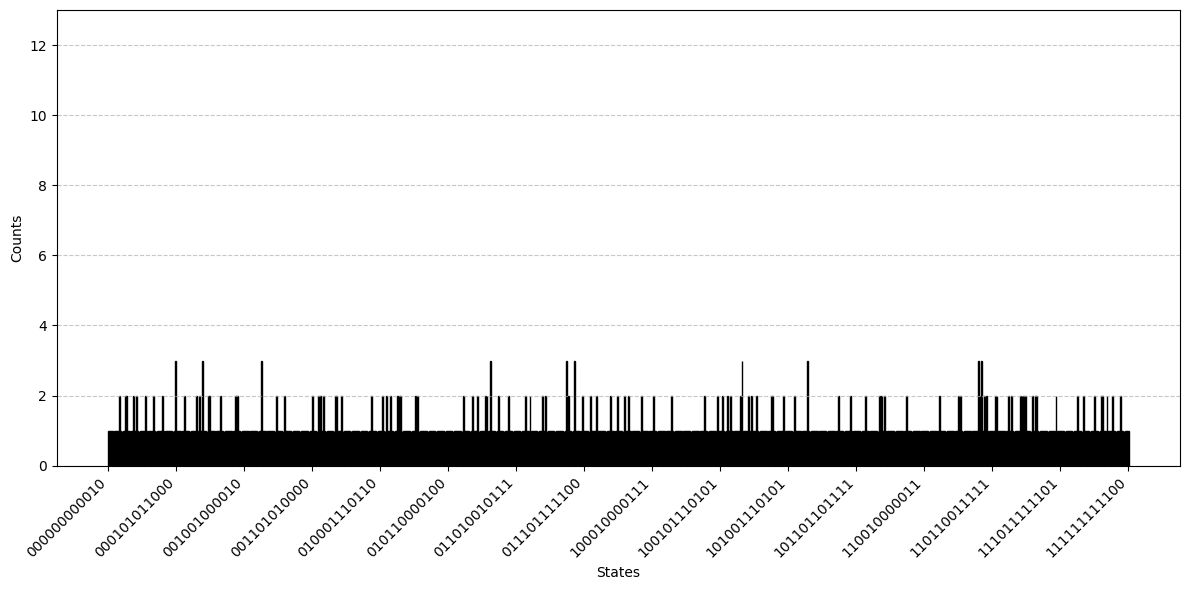

Job Execution time: 15.33 seconds
Job Execution time: 15.33 seconds
Number of Qubits used: 25
Estimated Number of Gate Operations: 781
Actual Number of Gate Operations: Not Available (Contact Quantum Rings Support)
N:3127 Factor 1: 59
N:3127 Factor 2: 53
Total time taken to factor N=3127: 30.53 seconds
Successfully factored N = 3127: 59 * 53 = 3127


In [6]:
import math
from fractions import Fraction
import time
from matplotlib import pyplot as plt

# Dictionary of semiprimes and their bit lengths (add more here!)
semiprimes = {
    8: 143,
    10: 899,
    12: 3127
}

def continued_fractions(phase, N, a):  # Add 'a' as an argument
    """Estimates the period (r) using continued fractions.

    Args:
        phase (float): The phase estimated from the quantum measurement.
        N (int): The number being factored.
        a (int): The base used in modular exponentiation.

    Returns:
        int: The estimated period (r), or 0 if no suitable r is found.
    """
    best_r = 0
    min_diff = 1
    for i in range(1, 3000):
        frac = Fraction(phase).limit_denominator(i)
        r = frac.denominator
        if (a**r % N) == 1:  # Now 'a' is accessible
            return r
        diff = abs(phase - frac)
        if diff < min_diff:
            min_diff = diff
            best_r = frac.denominator
    return best_r

def estimate_gate_count(qc):
    """Estimates the gate count of a quantum circuit.

    Args:
        qc (QuantumCircuit): The quantum circuit.

    Returns:
        int: The estimated gate count.
    """
    op_counts = qc.count_ops()  # Get the counts of each operation
    total_count = sum(op_counts.values())  # Sum the counts
    return total_count

def shor_classical(N, a, r):
    """Classical post-processing to find factors.

    Args:
        N (int): The number being factored.
        a (int): The base used in modular exponentiation.
        r (int): The period estimated from continued fractions.

    Returns:
        tuple: A tuple containing the two factors (factor1, factor2), 
               or (None, None) if factors could not be found.
    """
    if r % 2 != 0 or r==0:
        return None, None

    x = pow(a, r // 2, N)
    factor1 = math.gcd(x - 1, N)
    factor2 = math.gcd(x + 1, N)

    if factor1 == 1 or factor2 == 1 or factor1 * factor2 != N:
        return None, None

    return factor1, factor2


def factor_semiprime(N, bit_size, backend):  # Add backend as argument
    """Factors a semiprime using Shor's algorithm.

    Args:
        N (int): The semiprime to factor.
        bit_size (int): The number of counting qubits.
        backend (BackendV2): The Quantum Rings backend.

    Returns:
        tuple: A tuple containing the two factors (factor1, factor2),
               or (None, None) if factorization fails.
    """
    a = 2
    while math.gcd(a, N) != 1:
        a += 1
        if a > N:
            raise ValueError(f"No coprime 'a' found for N = {N}")

    target_size = math.ceil(math.log(N, 2)) + 1  # Size of the target register
    n_count = bit_size  # Number of counting qubits
    total_qubits = n_count + target_size  # Total number of qubits
    a
    found_factors = False
    while not found_factors:
        qr = QuantumRegister(n_count + target_size, 'q')
        cr = ClassicalRegister(n_count, 'c')
        qc = QuantumCircuit(qr, cr)

        for q in range(n_count):
            qc.h(qr[q])
        qc.x(qr[n_count])

        for q in range(n_count):
            power = 2**q
            c = pow(a, power, N)
            for i in range(target_size):
                if (c >> i) & 1:
                    for j in range(target_size):
                        if i != j:
                            qc.cx(qr[q], qr[n_count + j])

        for qubit in range(n_count // 2):
            qc.swap(qr[qubit], qr[n_count - qubit - 1])
        for j in range(n_count):
            for m in range(j):
                angle = -math.pi / float(2**(j - m))
                qc.cu1(angle, qr[m], qr[j])
            qc.h(qr[j])

        qubits_to_measure = [qr[i] for i in range(n_count)]
        qc.measure(qubits_to_measure, cr)

        shots = 1024  # Adjust as needed
        print(f"Running Shor's algorithm for N = {N}...") #Print before job start
        job_start_time = time.time() #Time the job
        job = backend.run(qc, shots=shots, memory=True)
        job_monitor(job)  # Monitor the job's progress
        result = job.result()  # Get the result
        counts = result.get_counts()  # Get the counts
        plot_histogram(counts)  # Plot the histogram
        job_end_time = time.time()
        job_execution_time = job_end_time - job_start_time
        print(f"Job Execution time: {job_execution_time:.2f} seconds") #Print the time it took to run the job
        estimated_gate_count = estimate_gate_count(qc)  # Estimate gate count

        # Placeholder for actual gate count retrieval (CONTACT QUANTUM RINGS SUPPORT)
        actual_gate_count = "Not Available (Contact Quantum Rings Support)"

        print(f"Job Execution time: {job_execution_time:.2f} seconds")
        print(f"Number of Qubits used: {total_qubits}")
        print(f"Estimated Number of Gate Operations: {estimated_gate_count}")
        print(f"Actual Number of Gate Operations: {actual_gate_count}")

        for result in job.result().get_memory():
            phase = int(result, 2) / 2**n_count
            r = continued_fractions(phase, N, a)

            if r > 0:
                factor1, factor2 = shor_classical(N, a, r)

                if factor1 is not None and factor2 is not None:
                    found_factors = True
                    print(f"N:{N} Factor 1: {factor1}")
                    print(f"N:{N} Factor 2: {factor2}")
                    return factor1, factor2

        print(f"N:{N} Trying again...")
    return None, None

for bit_size, N in semiprimes.items():
    start_time = time.time() #Time the whole factorization process
    print(f"\nFactoring N = {N} (bit size {bit_size})")
    factor1, factor2 = factor_semiprime(N, bit_size, backend) #Pass backend to the function

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Total time taken to factor N={N}: {total_time:.2f} seconds") #Print the total time

    if factor1 and factor2:
        print(f"Successfully factored N = {N}: {factor1} * {factor2} = {N}")
    else:
        print(f"Failed to factor N = {N} after multiple attempts.")